# Prediction of the results of the second round of the 2019 presidential elections in Tunisia

The goal of this project is to predict the results of the second round of the 2019 presidential elections in Tunisia based on the data of the first round of these elections.
The idea is to apply Clustering, a technique of unsupervised learning in order to make two political families  :

* The candidates which are similar to Kaies Saiid 
* The candidates which are similar to Nabil Karoui

The similarity is based on the electoral program, the convictions, the elective category, the number of votes, ...



### Dataset

The dataset was constructed based on information taken from the facebook pages and the reports of Sigma Conseil.

### Features

- 'TUNIS1', 'TUNIS2', 'NABEUL1','NABEUL2', 'BIZERTE', 'BEJA ', 'JANDOUBA', 'KEF', 'SELYENA','ZAGHOUANE', 'SOUSSE', 'MONESTIR', 'SFAX1', 'SFAX2', 'MAHDYA', 'GBELI','GABES', 'TATAOUINE', 'MEDNINE', 'GASSRINE ','TOZEUR', 'GAFSA','SIDI BOU', 'aryena', 'manouba', 'bnarous', 'kairwen': Number  of votes in each electoral center

- '18-25', '25-46', '46-60', '60+': Electoral Age Categories of each candidate

- 'nide', 'nahdha': Party affiliations for each voter from 2014 election

- 'Myrath':  Inheritance Law (Election Program: binary input) 

- 'fr: Nationalization of Wealth (Election Program: binary input) 

- 'RevOL': Revolutionary Category 

- 'percentage': Percentage of votes in the first round

- 'choice': The intention to vote of this candidate during the second round ([0:Nabil , 1:Kaies  ,  0.5 no information])

- 'edu': Whether the majority of the voters are educated or not

- 'nouv': Whether the majority of the voters is voting for the first time

### Acknowledgement

This project was realized by Helmi Klai and supervised by Lilia Ennouri as part of the Engineering Department of Data Co-Lab

## Code

In [56]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'my doc\\python'))
	print(os.getcwd())
except:
	pass


In [57]:
#importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import random
import csv
from sklearn.decomposition import FastICA

In [58]:
#read the csv file
df=pd.read_csv('presidential_elections.csv')
df.head()


,Candidate,18-25,25-46,46-60,60+,TUNIS1,TUNIS2,NABEUL1,NABEUL2,BIZERTE,...,aryena,manouba,bnarous,kairwen,fr,nide,nahdha,nouv,choice,percentage
0,rahoui,1,2,3,0,1229,1761,943,710,999,...,1421,859,2011,901,1,0,0,0,0.0,0.81
1,Abbou,5,12,10,1,9116,12443,5761,3623,5767,...,9395,5543,13597,4849,1,0,0,1,1.0,3.63
2,abir,0,0,5,20,6941,11724,10009,6904,7177,...,8192,4067,10115,2937,0,20,0,0,0.0,4.02
3,nabil,0,2,25,40,24226,21076,28032,24504,45320,...,20926,20185,26758,29952,0,59,0,0,0.0,15.68
4,mrayhi,10,16,5,0,9253,13836,12073,6287,6906,...,11794,6493,17920,4275,1,0,0,1,1.0,6.56


In [59]:
#have some informations about data
df.info()
df=df.drop(columns=['Candidate'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 41 columns):
Candidate     26 non-null object
18-25         26 non-null int64
25-46         26 non-null int64
46-60         26 non-null int64
60+           26 non-null int64
TUNIS1        26 non-null int64
TUNIS2        26 non-null int64
NABEUL1       26 non-null int64
NABEUL2       26 non-null int64
BIZERTE       26 non-null int64
BEJA          26 non-null int64
JANDOUBA      26 non-null int64
KEF           26 non-null int64
SELYENA       26 non-null int64
ZAGHOUANE     26 non-null int64
SOUSSE        26 non-null int64
MONESTIR      26 non-null int64
SFAX1         26 non-null int64
SFAX2         26 non-null int64
MAHDYA        26 non-null int64
GBELI         26 non-null int64
GABES         26 non-null int64
TATAOUINE     26 non-null int64
MEDNINE       26 non-null int64
GASSRINE      26 non-null int64
TOZEUR        26 non-null int64
GAFSA         26 non-null int64
SIDI BOU      26 non-null int64


#### Step 1: We will summarize all the features which discribe the number of votes in each city for each candidate in one feature: votes

In [60]:
#Here we will choose the features "electoral centers" for ica algorithm 
electoral_centers=df[['TUNIS1', 'TUNIS2', 'NABEUL1','NABEUL2', 'BIZERTE', 'BEJA ', 'JANDOUBA', 'KEF', 'SELYENA',
       'ZAGHOUANE', 'SOUSSE', 'MONESTIR', 'SFAX1', 'SFAX2', 'MAHDYA', 'GBELI','GABES', 'TATAOUINE', 'MEDNINE', 'GASSRINE ',
        'TOZEUR', 'GAFSA','SIDI BOU','aryena','manouba', 'bnarous', 'kairwen']]

# Initialize the algorithm and set the number of PC's
ica = FastICA(n_components=1)

# Fit and transform the model to data. It returns a list of independent components 
c=ica.fit_transform(electoral_centers)

In [61]:
#we will store all the information of the ica model in a column to  :)
df['votes']=c

#### Step 2: The clustering

In [62]:
#Here we will choose the features of the model in step 2 
#we will use the feature "votes" instead of the features representing the votes in the different governorates
samples=df[['votes','18-25','25-46','46-60','60+','Myrath','RevOL','edu','fr','nide','nahdha','nouv','choice']].iloc[: , :].values

In [63]:
#model kmeans for clustering the candidates on two clusters 
model=KMeans(n_clusters=2)

#Nomalization + kmeans
X=Normalizer()
pipe=make_pipeline(X,model)
pipe.fit(samples)
tab2=pipe.predict(samples)

In [64]:
#Our clusters = political families ( 0:Nabil, 1:Kaies)
#please check the table to verify the cluster of each candidate 
df['clusters']=tab2
df

,18-25,25-46,46-60,60+,TUNIS1,TUNIS2,NABEUL1,NABEUL2,BIZERTE,BEJA,...,bnarous,kairwen,fr,nide,nahdha,nouv,choice,percentage,votes,clusters
0,1,2,3,0,1229,1761,943,710,999,1025,...,2011,901,1,0,0,0,0.0,0.81,-0.087384,1
1,5,12,10,1,9116,12443,5761,3623,5767,1988,...,13597,4849,1,0,0,1,1.0,3.63,-0.025432,1
2,0,0,5,20,6941,11724,10009,6904,7177,5772,...,10115,2937,0,20,0,0,0.0,4.02,-0.027481,0
3,0,2,25,40,24226,21076,28032,24504,45320,24403,...,26758,29952,0,59,0,0,0.0,15.68,0.173092,0
4,10,16,5,0,9253,13836,12073,6287,6906,2893,...,17920,4275,1,0,0,1,1.0,6.56,0.024066,1
5,4,5,1,0,2394,5430,2355,1813,2656,872,...,3980,1256,0,1,0,0,0.0,1.82,-0.068392,1
6,1,0,2,0,285,190,211,192,333,164,...,304,322,1,0,10,0,1.0,0.22,-0.097294,1
7,1,3,2,1,991,1023,1206,840,749,644,...,1350,1330,1,0,0,0,0.5,0.69,-0.088176,1
8,8,2,1,1,2999,2298,1301,1645,2878,1057,...,3704,2874,1,0,10,0,1.0,2.98,-0.054828,1
9,0,6,6,15,12264,37452,14423,10634,9091,4615,...,20953,8738,0,15,0,0,0.0,10.73,0.094854,0


#### Step 3: determine the percentage of votes for every candidate

In [65]:
#Sum the percentage of each cluster
tab=df.groupby('clusters')['percentage'].sum()

Text(0.02, 0.98, 'Kais Saaid VS Nabil Karoui')

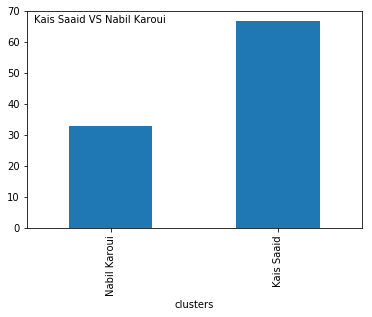

In [66]:
#plot the Results
ax=tab.plot(kind='bar')
# Create names on the x-axis
plt.xticks([0,1], ['Nabil Karoui' , 'Kais Saaid'])
ax.text(0.02, 0.98, "Kais Saaid VS Nabil Karoui", ha="left", va="top", transform=ax.transAxes)